In [66]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

import model
import data_loader
import loss
import tester

In [7]:
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [3]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


In [15]:
net = model.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_dlinknet34_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.5,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_dlinknet34_epoch20.pth is ready 
(threshold = 0.5, 784 pairs in test dataset)


In [16]:
img, lbl = next(iter(tt.test_dataset))

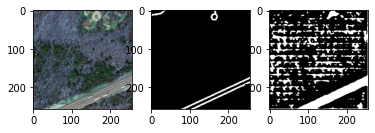

In [19]:
tt.set
tt.test_idx(1)

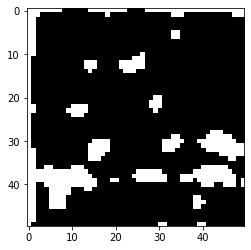

In [29]:
t = torch.cat([tt.pred]*3).permute(1, 2, 0).cpu()
plt.imshow(t[0:50,0:50,:])

In [48]:
tmp = t[:,:,0]
np.array(tmp)*255

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ...,   0., 255., 255.],
       [255., 255.,   0., ...,   0.,   0., 255.],
       ...,
       [255.,   0.,   0., ...,   0.,   0., 255.],
       [255.,   0.,   0., ...,   0.,   0., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [56]:
ret, img = cv2.threshold(np.array(tmp), 0.5, 255, cv2.THRESH_BINARY)

In [61]:
contours, _ = cv2.findContours(img.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
 n = len(contours)  # 轮廓的个数

In [65]:
n

223

In [94]:
cv_contours = []
for contour in tqdm(contours):
    area = cv2.contourArea(contour)
    areas.append(area)
    if area <= 4000:
        cv_contours.append(contour)

100%|██████████| 223/223 [00:00<00:00, 199728.76it/s]


In [95]:
img2 = cv2.fillPoly(img, cv_contours, (255, 255, 255))

In [99]:
len(cv_contours)

222

In [96]:
max(areas)

5290.5

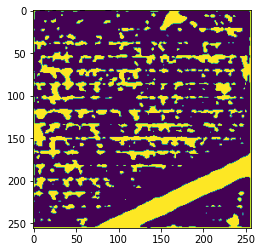

In [98]:
plt.imshow(img2)